In [2]:
# Import relevant libraries
import numpy as np 
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn import preprocessing
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.stats.outliers_influence import outlier_test
from sklearn import metrics
from scipy.stats import pearsonr
%matplotlib inline
sns.set()

# Import the VIF function
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

/Users/shuyi/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/shuyi/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
#1 - Explonatory Data 

df = pd.read_csv('MS9004_Assignment_2122s2.csv')
df.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior
0,1.464291,0.147004,0.541170,0.182354,0.400464,0.738181,1.980026,0.371605,0.209784,0.235137,0.755044,Ts65Dn,Saline,S/C
1,1.781572,0.146102,0.537532,0.202159,0.526507,0.839562,2.134343,0.482603,0.544662,0.515372,1.369644,Control,Memantine,C/S
2,1.425711,0.149849,0.490378,0.174367,0.590303,0.850151,2.118882,0.463417,0.613554,0.563807,1.571738,Control,Memantine,C/S
3,1.565796,0.144120,0.587164,0.199001,0.733511,1.300077,2.108993,0.328440,0.713298,0.888564,1.993218,Ts65Dn,Memantine,C/S
4,1.054776,0.134505,0.375166,0.128599,0.727178,0.679020,1.978149,0.431567,2.088832,2.201831,4.942604,Control,Saline,C/S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1077 entries, 0 to 1076
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Y          1077 non-null   float64
 1   X1         1077 non-null   float64
 2   X2         1077 non-null   float64
 3   X3         1077 non-null   float64
 4   X4         1077 non-null   float64
 5   X5         1077 non-null   float64
 6   X6         1077 non-null   float64
 7   X7         1077 non-null   float64
 8   X8         1077 non-null   float64
 9   X9         1077 non-null   float64
 10  X10        1077 non-null   float64
 11  Genotype   1077 non-null   object 
 12  Treatment  1077 non-null   object 
 13  Behavior   1077 non-null   object 
dtypes: float64(11), object(3)
memory usage: 117.9+ KB


In [5]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000
mean,1.548413,0.156468,0.527347,0.181305,0.726933,0.942935,2.235409,0.446149,0.378519,0.425810,1.428682
std,0.248458,0.015089,0.082167,0.024950,0.188013,0.173039,0.254723,0.066507,0.216388,0.249362,0.466904
min,0.853176,0.100217,0.284001,0.099734,0.281285,0.344120,1.206098,0.258626,0.143894,0.145327,0.429032
25%,1.374922,0.146950,0.475480,0.166312,0.590303,0.826708,2.079042,0.398036,0.264334,0.288121,1.203665
50%,1.522698,0.156359,0.526676,0.182681,0.719591,0.930796,2.243043,0.448585,0.326658,0.366378,1.355846
75%,1.713334,0.165435,0.576994,0.198584,0.848640,1.045177,2.420306,0.490805,0.413561,0.487711,1.561316
max,2.586216,0.208698,0.889735,0.260739,1.412750,1.679953,2.877873,0.759588,2.133416,2.516367,6.113347


In [6]:
df.corr()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
Y,1.000000,0.569754,0.548115,0.554999,0.502013,0.633568,0.547355,0.515466,-0.252940,-0.206133,-0.199529
X1,0.569754,1.000000,0.617941,0.522578,0.374987,0.410657,0.611854,0.540401,-0.231401,-0.233143,-0.159991
X2,0.548115,0.617941,1.000000,0.366691,0.208639,0.230605,0.506161,0.281466,-0.369572,-0.402207,-0.336116
X3,0.554999,0.522578,0.366691,1.000000,0.436017,0.575588,0.579089,0.349815,-0.140791,-0.088226,-0.093669
X4,0.502013,0.374987,0.208639,0.436017,1.000000,0.488721,0.421634,0.471350,-0.211780,-0.184921,0.018844
X5,0.633568,0.410657,0.230605,0.575588,0.488721,1.000000,0.488776,0.428885,0.046207,0.142495,0.139246
X6,0.547355,0.611854,0.506161,0.579089,0.421634,0.488776,1.000000,0.448797,-0.150219,-0.158898,-0.113414
X7,0.515466,0.540401,0.281466,0.349815,0.471350,0.428885,0.448797,1.000000,-0.055293,-0.047246,0.039426
X8,-0.252940,-0.231401,-0.369572,-0.140791,-0.211780,0.046207,-0.150219,-0.055293,1.000000,0.959578,0.804089
X9,-0.206133,-0.233143,-0.402207,-0.088226,-0.184921,0.142495,-0.158898,-0.047246,0.959578,1.000000,0.791173


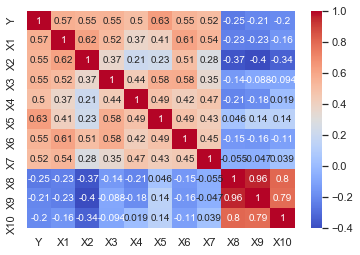

In [7]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm');

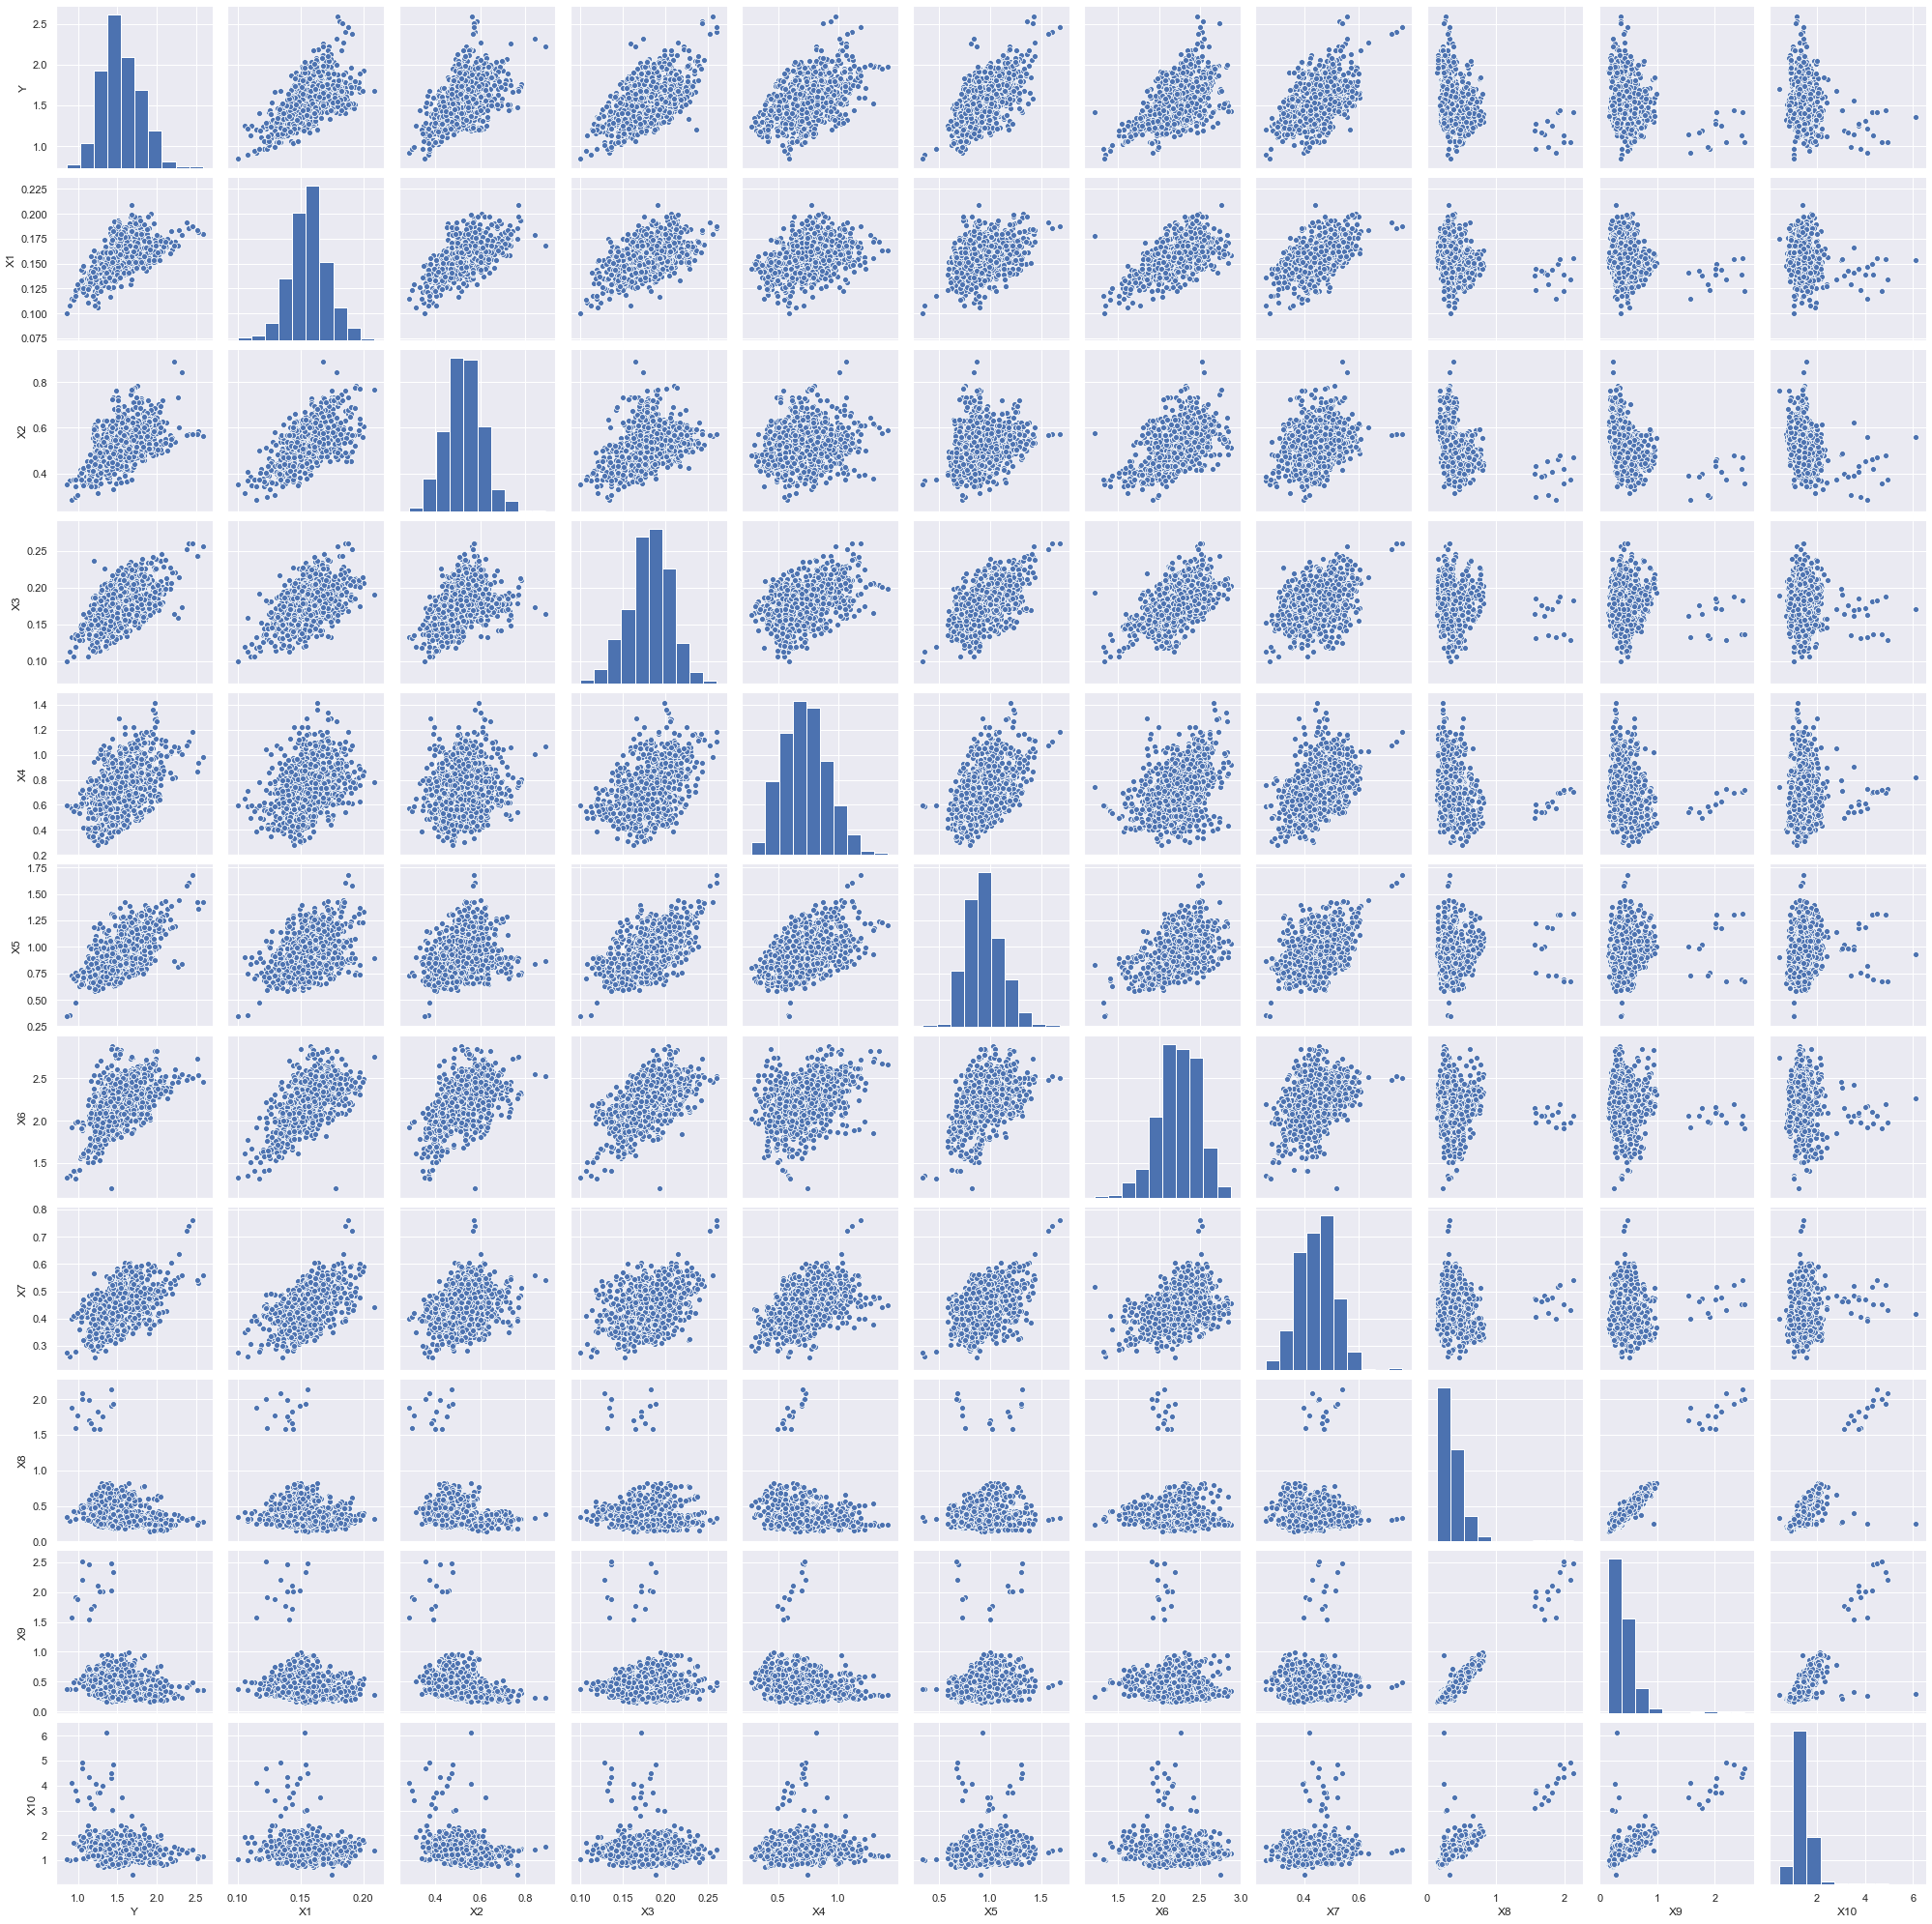

In [8]:
sns.pairplot(df);

In [9]:
#Qualitative
print(df['Genotype'].value_counts())

Control    570
Ts65Dn     507
Name: Genotype, dtype: int64


In [10]:
print(df['Treatment'].value_counts())

Memantine    570
Saline       507
Name: Treatment, dtype: int64


In [11]:
print(df['Behavior'].value_counts())

S/C    552
C/S    525
Name: Behavior, dtype: int64


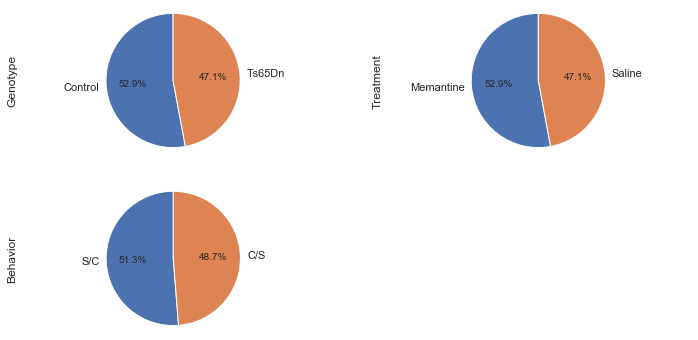

In [12]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(221)
df['Genotype'].value_counts().plot(kind='pie',autopct='%.1f%%', startangle=90)
plt.axis('equal')
ax2 = fig.add_subplot(222)
df['Treatment'].value_counts().plot(kind='pie',autopct='%.1f%%', startangle=90)
plt.axis('equal')
ax3 = fig.add_subplot(223)
df['Behavior'].value_counts().plot(kind='pie',autopct='%.1f%%', startangle=90)
plt.axis('equal');

In [13]:
#Fit Model 

#Split training + testing set 75:25
#Random State/ seed 2944

from sklearn.model_selection import train_test_split
dftrain, dftest = train_test_split(df, test_size=0.25, random_state=2944)

print(len(dftrain)/len(df))
print(len(dftest)/len(df))

0.7493036211699164
0.25069637883008355


In [14]:
#2 - Fit Model: Full MLR Model with all Quantitative and Qualitative Predictors 

mlr = ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + Genotype + Treatment + Behavior', dftrain).fit()
print(mlr.summary())
print("\nMSE =", mlr.mse_resid)


# Check Multicolinarity - VIF 
for i in range(14):
    predictor = mlr.model.exog_names[i]
    Vif = vif(mlr.model.exog, i)
    print("VIF of", predictor, Vif)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          4.36e-180
Time:                        12:21:38   Log-Likelihood:                 436.14
No. Observations:                 807   AIC:                            -844.3
Df Residuals:                     793   BIC:                            -778.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              -0.0541    

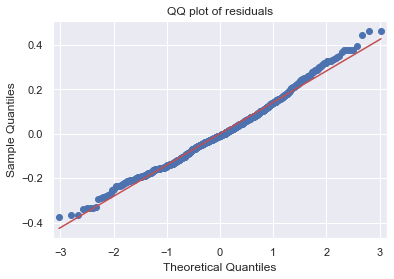

In [15]:
#3 - Evaluating Model

#Check Assumption: Normality 
res = mlr.resid

sm.qqplot(res, line='s');
plt.title('QQ plot of residuals');

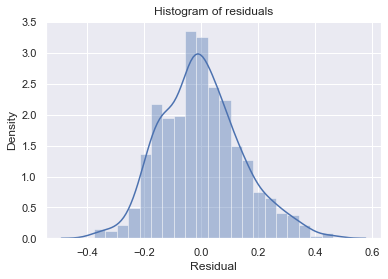

In [16]:
sns.distplot(res);
plt.title('Histogram of residuals')
plt.xlabel('Residual')
plt.ylabel('Density');

In [17]:
# To perform the Jarque-Bera test on residuals,
# The function returns: JB test statistic, p-value, estimated skewness, estimated kurtosis

#As the p-value is less than alpha, normality is rejected

sm.stats.jarque_bera(res)

(17.20014457435434,
 0.0001840924856604591,
 0.34974497014909967,
 3.149138481283154)

In [18]:
#As the p-value is less than alpha, normality is rejected
sm.stats.omni_normtest(res)

NormaltestResult(statistic=16.731646789342317, pvalue=0.00023268536199800045)

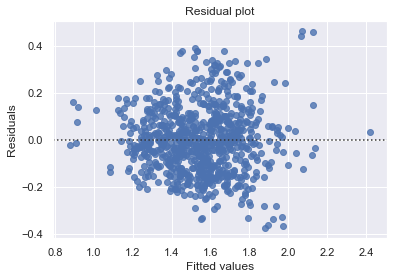

In [19]:
#Check Assumption: Homoscedasticity 

# Plot residuals vs fitted values to check for homoscedasticity.
# Breusch–Pagan test: we want to see "large" p-value so as not to reject homoscedasticity.

sns.residplot(mlr.fittedvalues, res);
plt.title('Residual plot')
plt.xlabel('Fitted values')
plt.ylabel('Residuals');

In [20]:
# Perform the Breusch-Pagan test on residuals.
# The function returns: Lagrange multiplier statistic, p-value, F-value, F p-value

#Homoscedasticity is rejected as P-value is less than alpha
sm.stats.het_breuschpagan(res, mlr.model.exog)

(79.38750751141288,
 1.4382561349766197e-11,
 6.65551788649663,
 3.4418394507284964e-12)

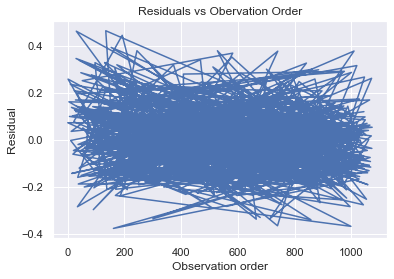

In [21]:
#Check Assumption: Independence  

plt.plot(res);
plt.title('Residuals vs Obervation Order')
plt.xlabel('Observation order')
plt.ylabel('Residual');

In [22]:
#Durbin-Watson test is used to detect autocorrelation in residuals. We want DW around 2.
sm.stats.durbin_watson(res)

1.9968718451226308

In [23]:
#Detecting Outliers 

# Outlier test: p-value close to zero indicates outlier - No presence of outliers 
ot = mlr.outlier_test()
print(ot.loc[ot["bonf(p)"]<0.05])

#Try to also print the data values of the outlier observation 
#print(df.loc[ot["bonf(p)"]<0.05])


Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []


In [24]:
#4 Improving the model: Centering variables - as standarizing is not applicable here (1)

df1 = df.copy()
df1.head()

#Centering X1 - X10 
df1['X1'] = df1['X1'] - np.mean(df1['X1'])
df1['X2'] = df1['X2'] - np.mean(df1['X2'])
df1['X3'] = df1['X3'] - np.mean(df1['X3'])
df1['X4'] = df1['X4'] - np.mean(df1['X4'])
df1['X5'] = df1['X5'] - np.mean(df1['X5'])
df1['X6'] = df1['X6'] - np.mean(df1['X6'])
df1['X7'] = df1['X7'] - np.mean(df1['X7'])
df1['X8'] = df1['X8'] - np.mean(df1['X8'])
df1['X9'] = df1['X9'] - np.mean(df1['X9'])
df1['X10'] = df1['X10'] - np.mean(df1['X10'])

df1.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior
0,1.464291,-0.009464,0.013823,0.001049,-0.326469,-0.204754,-0.255383,-0.074544,-0.168735,-0.190674,-0.673638,Ts65Dn,Saline,S/C
1,1.781572,-0.010366,0.010185,0.020853,-0.200426,-0.103373,-0.101066,0.036454,0.166144,0.089561,-0.059038,Control,Memantine,C/S
2,1.425711,-0.006619,-0.036969,-0.006938,-0.136630,-0.092783,-0.116527,0.017268,0.235036,0.137997,0.143056,Control,Memantine,C/S
3,1.565796,-0.012348,0.059817,0.017696,0.006578,0.357142,-0.126416,-0.117710,0.334779,0.462754,0.564536,Ts65Dn,Memantine,C/S
4,1.054776,-0.021963,-0.152181,-0.052706,0.000245,-0.263915,-0.257260,-0.014583,1.710314,1.776021,3.513922,Control,Saline,C/S


In [25]:
#Re-train/ test 1

dftrain1, dftest1 = train_test_split(df1, test_size=0.25, random_state=2944)

print(len(dftrain1)/len(df1))
print(len(dftest1)/len(df1))

0.7493036211699164
0.25069637883008355


In [26]:
mlr1 = ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + Genotype + Treatment + Behavior', dftrain1).fit()
print(mlr1.summary())
print("\nMSE =", mlr1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          4.36e-180
Time:                        12:21:40   Log-Likelihood:                 436.14
No. Observations:                 807   AIC:                            -844.3
Df Residuals:                     793   BIC:                            -778.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5587    

In [27]:
# Check Multicolinarity - VIF 
for i in range(14):
    predictor = mlr1.model.exog_names[i]
    Vif = vif(mlr1.model.exog, i)
    print("VIF of", predictor, Vif)

VIF of Intercept 4.020718817728941
VIF of Genotype[T.Ts65Dn] 1.388849882820477
VIF of Treatment[T.Saline] 1.1827562873580684
VIF of Behavior[T.S/C] 2.3264989974400914
VIF of X1 2.7295238129456307
VIF of X2 2.5006716025977975
VIF of X3 2.2083315059456448
VIF of X4 2.336939306574861
VIF of X5 2.44249891184632
VIF of X6 2.2287798286579394
VIF of X7 1.8353250795589162
VIF of X8 18.661315772868875
VIF of X9 19.00432433182309
VIF of X10 3.2780788863432626


In [57]:
# Perform the Breusch-Pagan test on residuals.
# The function returns: Lagrange multiplier statistic, p-value, F-value, F p-value

#Homoscedasticity is rejected as P-value is less than alpha

res1 = mlr1.resid
sm.stats.het_breuschpagan(res1, mlr1.model.exog)

(79.38750751141305,
 1.4382561349765132e-11,
 6.655517886496646,
 3.4418394507282153e-12)

In [28]:
#Detecting Outliers 

# Outlier test: p-value close to zero indicates outlier - No presence of outliers 
ot1 = mlr1.outlier_test()
print(ot1.loc[ot1["bonf(p)"]<0.05])

Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []


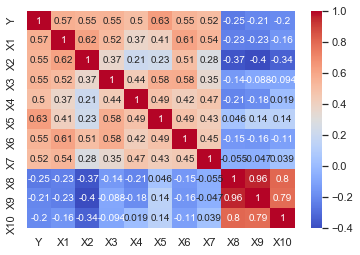

In [29]:
#4 Improving the model: Variable Selection - PCA (2)

sns.heatmap(df1.corr(), annot=True, cmap='coolwarm');

In [30]:
sclr = preprocessing.StandardScaler()
sclr.fit(dftrain1[['X8','X9','X10']])

print('mean is', sclr.mean_)
print('sd is', sclr.scale_)

mean is [-0.0014379   0.00012182 -0.00801157]
sd is [0.21791478 0.25554161 0.48282486]


In [31]:
zdftrain = dftrain1.copy()
zdftrain[['X8','X9','X10']] = sclr.transform(dftrain1[['X8','X9', 'X10']])
zdftrain.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior
9,2.046849,0.005766,0.010552,0.054067,0.033990,0.354119,0.136625,0.051089,1.219573,1.242368,0.959217,Control,Memantine,C/S
403,1.238208,-0.012076,-0.108715,-0.007694,-0.328471,-0.139214,0.416714,-0.078225,0.867844,0.692208,0.585093,Ts65Dn,Memantine,C/S
239,1.375824,-0.001565,-0.052385,-0.012320,-0.113112,-0.119187,-0.116837,0.005493,0.108663,0.236607,0.218639,Control,Saline,C/S
162,1.514763,0.025817,0.044968,-0.014211,0.090288,-0.109387,0.084873,0.064976,0.097897,-0.802259,0.457611,Ts65Dn,Memantine,S/C
1045,1.540814,-0.029268,-0.166804,-0.034611,0.168495,0.208389,-0.427351,-0.010108,1.140455,0.969381,2.012150,Control,Saline,C/S


In [32]:
zdftest = dftest1.copy()
zdftest[['X8','X9','X10']] = sclr.transform(dftest1[['X8','X9','X10']])
zdftest.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior
824,1.882483,0.004237,0.036884,0.031181,0.110994,0.288061,-0.147565,-0.021177,-0.233474,-0.044709,-0.007085,Ts65Dn,Memantine,S/C
1014,1.609732,0.029927,0.026874,0.012935,0.185826,0.101554,0.312158,0.009759,-0.363708,-0.560183,-0.092803,Ts65Dn,Memantine,S/C
154,1.695177,0.018752,0.085744,0.003537,0.009712,0.030693,0.314840,-0.012198,-0.051636,-0.184770,-0.194951,Ts65Dn,Memantine,S/C
449,2.048886,0.013750,0.015951,0.011909,0.261007,0.143581,0.121751,0.056062,-0.684137,-0.425664,0.030935,Ts65Dn,Memantine,S/C
1052,1.569562,0.025111,0.046623,0.036930,0.209606,0.341653,0.266331,0.030689,-0.555984,-0.366519,-0.106464,Ts65Dn,Memantine,S/C


In [33]:
# Create the PCA instance with 3 components, then 
# fit standardized training data of columns X8, X9 to PCA.
pca3 = PCA(n_components=3)
pca3.fit(zdftrain[['X8' ,'X9','X10']])

# Extract principal components, and the corresponding proportion of variance.
print('Proportion of total variance:', pca3.explained_variance_ratio_)
print('\nPrincipal components are:\n', pca3.components_)

Proportion of total variance: [0.8987815  0.08907525 0.01214325]

Principal components are:
 [[ 0.59208442  0.58966885  0.54929653]
 [-0.3670844  -0.40945114  0.83522381]
 [-0.71741555  0.6961612   0.0259714 ]]


In [34]:
# Alternatively, display the principal components in a table form.
pd.DataFrame(pca3.components_, columns=['X8','X9','X10'])

,X8,X9,X10
0,0.592084,0.589669,0.549297
1,-0.367084,-0.409451,0.835224
2,-0.717416,0.696161,0.025971


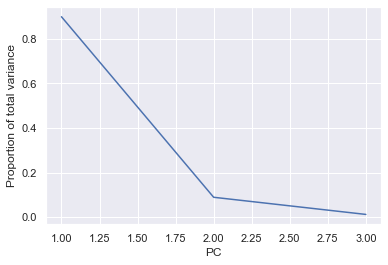

In [35]:
# Optional: Produce a scree plot to select the number of components to retain.
# Look for "elbow" in the scree plot.  Number of PCs = n that is just left of the elbow.
plt.plot([1,2,3],pca3.explained_variance_ratio_)
plt.xlabel('PC')
plt.ylabel('Proportion of total variance');

In [36]:
#We can decide to retain only PC1 which accounts for nearly 90% of the total variability in Income, Limit and Rating. But, if our objective is not to reduce dimension, we can even choose to retain all PCs.

print('coefficients of PC1 are:', pca3.components_[0])

coefficients of PC1 are: [0.59208442 0.58966885 0.54929653]


In [37]:
# Transform training data Z_Income, Z_Limit, Z_Rating to PC1, PC2, PC3 scores.
newX = pca3.transform(zdftrain[['X8','X9','X10']])

# Append PC1 scores to (standardized) training data frame
zdftrain['pc1'] = newX[:,0]
zdftrain.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior,pc1
9,2.046849,0.005766,0.010552,0.054067,0.033990,0.354119,0.136625,0.051089,1.219573,1.242368,0.959217,Control,Memantine,C/S,1.981571
403,1.238208,-0.012076,-0.108715,-0.007694,-0.328471,-0.139214,0.416714,-0.078225,0.867844,0.692208,0.585093,Ts65Dn,Memantine,C/S,1.243400
239,1.375824,-0.001565,-0.052385,-0.012320,-0.113112,-0.119187,-0.116837,0.005493,0.108663,0.236607,0.218639,Control,Saline,C/S,0.323955
162,1.514763,0.025817,0.044968,-0.014211,0.090288,-0.109387,0.084873,0.064976,0.097897,-0.802259,0.457611,Ts65Dn,Memantine,S/C,-0.163740
1045,1.540814,-0.029268,-0.166804,-0.034611,0.168495,0.208389,-0.427351,-0.010108,1.140455,0.969381,2.012150,Control,Saline,C/S,2.352126


In [38]:
# Transform testing data Z_Income, Z_Limit, Z_Rating to PC1, PC2, PC3 scores.
del newX
newX = pca3.transform(zdftest[['X8' , 'X9','X10']])

# Append PC1 scores to (standardized) testing data frame
zdftest['pc1'] = newX[:,0]
zdftest.tail()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Genotype,Treatment,Behavior,pc1
824,1.882483,0.004237,0.036884,0.031181,0.110994,0.288061,-0.147565,-0.021177,-0.233474,-0.044709,-0.007085,Ts65Dn,Memantine,S/C,-0.168492
1014,1.609732,0.029927,0.026874,0.012935,0.185826,0.101554,0.312158,0.009759,-0.363708,-0.560183,-0.092803,Ts65Dn,Memantine,S/C,-0.596645
154,1.695177,0.018752,0.085744,0.003537,0.009712,0.030693,0.314840,-0.012198,-0.051636,-0.184770,-0.194951,Ts65Dn,Memantine,S/C,-0.246612
449,2.048886,0.013750,0.015951,0.011909,0.261007,0.143581,0.121751,0.056062,-0.684137,-0.425664,0.030935,Ts65Dn,Memantine,S/C,-0.639075
1052,1.569562,0.025111,0.046623,0.036930,0.209606,0.341653,0.266331,0.030689,-0.555984,-0.366519,-0.106464,Ts65Dn,Memantine,S/C,-0.603795


In [39]:
# Fit MLR on training data; start with full model, then select optimal model with backward selection.
pcr = ols('Y ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + Genotype + Treatment + Behavior + pc1', zdftrain).fit()
print(pcr.summary())
print("\nMSE = ", pcr.mse_resid)

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     123.1
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          4.36e-180
Time:                        12:21:42   Log-Likelihood:                 436.14
No. Observations:                 807   AIC:                            -844.3
Df Residuals:                     793   BIC:                            -778.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.5593    

In [60]:
# Check Multicolinarity - VIF 
for i in range(15):
    predictor = pcr.model.exog_names[i]
    Vif = vif(pcr.model.exog, i)
    print("VIF of", predictor, Vif)

VIF of Intercept 4.021370448644515
VIF of Genotype[T.Ts65Dn] 1.3888498828204767
VIF of Treatment[T.Saline] 1.1827562873580684
VIF of Behavior[T.S/C] 2.326498997440091
VIF of X1 2.7295238129456307
VIF of X2 2.5006716025977975
VIF of X3 2.2083315059456448
VIF of X4 2.336939306574861
VIF of X5 2.4424989118463185
VIF of X6 2.2287798286579394
VIF of X7 1.8353250795589162
VIF of X8 inf
VIF of X9 inf
VIF of X10 inf
VIF of pc1 inf


/Users/shuyi/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [59]:
# Perform the Breusch-Pagan test on residuals.
# The function returns: Lagrange multiplier statistic, p-value, F-value, F p-value

#Homoscedasticity is rejected as P-value is less than alpha

res2 = pcr.resid
sm.stats.het_breuschpagan(res2, pcr.model.exog)

(79.38750751141458,
 3.674934259051013e-11,
 6.655517886496786,
 3.4418394507256594e-12)

In [41]:
#Detecting Outliers 

# Outlier test: p-value close to zero indicates outlier - No presence of outliers 
ot2 = pcr.outlier_test()
print(ot2.loc[ot2["bonf(p)"]<0.05])

Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []


In [65]:
#4 Improving the model: Transforming the variables (3)
from scipy.stats import pearsonr
pearsonr(zdftrain.Y, zdftrain.pc1)

(-0.21266123562082057, 1.0488710297559246e-09)

In [66]:
# Or, compute correlations of Y vs. different X', all at once.
# from scipy.stats import pearsonr
transformations = {'x':lambda x: x, 'lnx':lambda x: np.log(x), '1/x':lambda x: 1/x, 
                  'sqrt(x)':lambda x: np.sqrt(x), 'exp(-x/1000)':lambda x: np.exp(-x/1000)}
for tf in transformations:
    r_coef, r_pval = pearsonr(transformations[tf](zdftrain.Y), zdftrain.pc1)
    print('Transformation: %s   Pearsons r: %0.3f' %(tf, r_coef))

Transformation: x   Pearsons r: -0.213
Transformation: lnx   Pearsons r: -0.225
Transformation: 1/x   Pearsons r: 0.235
Transformation: sqrt(x)   Pearsons r: -0.219
Transformation: exp(-x/1000)   Pearsons r: 0.213


In [42]:
#4 Improving the model: Transforming the variables (3)
pcr1 = ols('np.log(Y) ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + Genotype + Treatment + Behavior + pc1', zdftrain).fit()
print(pcr1.summary())
print("\nMSE = ", pcr1.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          1.02e-186
Time:                        12:21:43   Log-Likelihood:                 805.60
No. Observations:                 807   AIC:                            -1583.
Df Residuals:                     793   BIC:                            -1517.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4288    

In [67]:
# Perform the Breusch-Pagan test on residuals.
# The function returns: Lagrange multiplier statistic, p-value, F-value, F p-value

#Homoscedasticity is rejected as P-value is less than alpha

res3 = pcr1.resid
sm.stats.het_breuschpagan(res3, pcr1.model.exog)

(73.47979300787507,
 4.4919721778853696e-10,
 6.110625625244024,
 5.6219686161093606e-11)

In [43]:
# Check Multicolinarity - VIF 
for i in range(14):
    predictor = pcr1.model.exog_names[i]
    Vif = vif(pcr1.model.exog, i)
    print("VIF of", predictor, Vif)

VIF of Intercept 4.021370448644515
VIF of Genotype[T.Ts65Dn] 1.3888498828204767
VIF of Treatment[T.Saline] 1.1827562873580684
VIF of Behavior[T.S/C] 2.326498997440091
VIF of X1 2.7295238129456307
VIF of X2 2.5006716025977975
VIF of X3 2.2083315059456448
VIF of X4 2.336939306574861
VIF of X5 2.4424989118463185
VIF of X6 2.2287798286579394
VIF of X7 1.8353250795589162
VIF of X8 inf
VIF of X9 inf
VIF of X10 inf


/Users/shuyi/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [44]:
#Detecting Outliers 

# Outlier test: p-value close to zero indicates outlier - No presence of outliers 
ot3 = pcr1.outlier_test()
print(ot3.loc[ot3["bonf(p)"]<0.05])

Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []


In [45]:
#4 Improving the model: Backward selection (4)

#Remove X9

pcr2 = ols('np.log(Y) ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X10 + Genotype + Treatment + Behavior + pc1', zdftrain).fit()
print(pcr2.summary())
print("\nMSE = ", pcr2.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     130.4
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          1.02e-186
Time:                        12:21:44   Log-Likelihood:                 805.60
No. Observations:                 807   AIC:                            -1583.
Df Residuals:                     793   BIC:                            -1517.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4288    

In [46]:
#Remove X8

pcr3 = ols('np.log(Y) ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X10 + Genotype + Treatment + Behavior + pc1', zdftrain).fit()
print(pcr3.summary())
print("\nMSE = ", pcr3.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     141.5
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          8.43e-188
Time:                        12:21:44   Log-Likelihood:                 805.60
No. Observations:                 807   AIC:                            -1585.
Df Residuals:                     794   BIC:                            -1524.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4288    

In [47]:
#Remove X6

pcr4 = ols('np.log(Y) ~ X1 + X2 + X3 + X4 + X5 + X7 + X10 + Genotype + Treatment + Behavior + pc1', zdftrain).fit()
print(pcr4.summary())
print("\nMSE = ", pcr4.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     154.5
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          7.11e-189
Time:                        12:21:44   Log-Likelihood:                 805.52
No. Observations:                 807   AIC:                            -1587.
Df Residuals:                     795   BIC:                            -1531.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4286    

In [48]:
#Remove X1

pcr5 = ols('np.log(Y) ~ X2 + X3 + X4 + X5 + X7 + X10 + Genotype + Treatment + Behavior + pc1', zdftrain).fit()
print(pcr5.summary())
print("\nMSE = ", pcr5.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     170.0
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          6.33e-190
Time:                        12:21:44   Log-Likelihood:                 805.34
No. Observations:                 807   AIC:                            -1589.
Df Residuals:                     796   BIC:                            -1537.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4290    

In [49]:
#Remove X10

pcr6 = ols('np.log(Y) ~ X2 + X3 + X4 + X5 + X7 + Genotype + Treatment + Behavior + pc1', zdftrain).fit()
print(pcr6.summary())
print("\nMSE = ", pcr6.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     187.7
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          3.62e-190
Time:                        12:21:44   Log-Likelihood:                 803.22
No. Observations:                 807   AIC:                            -1586.
Df Residuals:                     797   BIC:                            -1540.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4305    

In [50]:
# Check Multicolinarity - VIF 
for i in range(10):
    predictor = pcr6.model.exog_names[i]
    Vif = vif(pcr6.model.exog, i)
    print("VIF of", predictor, Vif)

VIF of Intercept 3.8895245311373325
VIF of Genotype[T.Ts65Dn] 1.225490966797098
VIF of Treatment[T.Saline] 1.1512587974294366
VIF of Behavior[T.S/C] 2.0981454617595956
VIF of X2 1.7861056170323455
VIF of X3 1.9013972154723027
VIF of X4 2.219669625692334
VIF of X5 2.2049739762739353
VIF of X7 1.5246617869132972
VIF of pc1 1.3564975193445545


In [68]:
res4 = pcr6.resid
sm.stats.het_breuschpagan(res4, pcr6.model.exog)

(29.342297613164536,
 0.0005672572536311833,
 3.3413460169364932,
 0.0005035414938187384)

In [51]:
#Detecting Outliers 

# Outlier test: p-value close to zero indicates outlier - No presence of outliers 
ot4 = pcr6.outlier_test()
print(ot4.loc[ot4["bonf(p)"]<0.05])

Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []


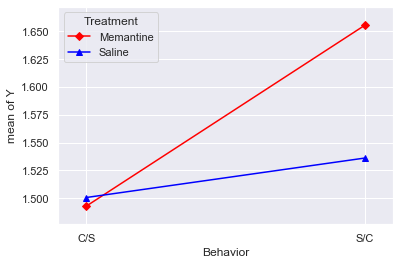

In [52]:
#4 Improving the model: Interaction with Qualitative variables (5)

#interaction plot Behavior * Treatment
interaction_plot(x=df["Behavior"], trace=df["Treatment"], response=df['Y'], 
                 colors=['red','blue'], markers=['D','^']);

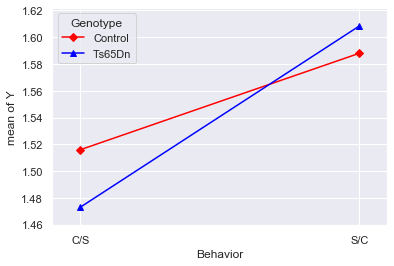

In [53]:
interaction_plot(x=df["Behavior"], trace=df["Genotype"], response=df['Y'], 
                 colors=['red','blue'], markers=['D','^']); 

In [54]:
#Interaction terms 
pcr7 = ols('np.log(Y) ~ X2 + X3 + X4 + X5 + X7 + Behavior * Treatment + Behavior * Genotype + pc1', zdftrain).fit()
print(pcr7.summary())
print("\nMSE = ", pcr7.mse_resid)

                            OLS Regression Results                            
Dep. Variable:              np.log(Y)   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     167.5
Date:                Fri, 18 Feb 2022   Prob (F-statistic):          1.93e-198
Time:                        12:21:45   Log-Likelihood:                 828.00
No. Observations:                 807   AIC:                            -1632.
Df Residuals:                     795   BIC:                            -1576.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [55]:
#Detecting Outliers 

# Outlier test: p-value close to zero indicates outlier - No presence of outliers 
ot5 = pcr7.outlier_test()
print(ot5.loc[ot5["bonf(p)"]<0.05])

Empty DataFrame
Columns: [student_resid, unadj_p, bonf(p)]
Index: []


In [56]:
# Check Multicolinarity - VIF 
for i in range(11):
    predictor = pcr7.model.exog_names[i]
    Vif = vif(pcr7.model.exog, i)
    print("VIF of", predictor, Vif)

VIF of Intercept 5.860730481883337
VIF of Behavior[T.S/C] 4.324049815641803
VIF of Treatment[T.Saline] 2.4893149276147635
VIF of Genotype[T.Ts65Dn] 2.3146777776771303
VIF of Behavior[T.S/C]:Treatment[T.Saline] 3.9864464782421027
VIF of Behavior[T.S/C]:Genotype[T.Ts65Dn] 3.179976856608709
VIF of X2 1.8166517592399647
VIF of X3 2.277412956944242
VIF of X4 2.4297664546223143
VIF of X5 2.404890961145881
VIF of X7 1.5678516475691289


In [69]:
res5 = pcr7.resid
sm.stats.het_breuschpagan(res5, pcr7.model.exog)

(38.22349879378219,
 7.172327855211913e-05,
 3.5933935277652553,
 5.743348091915504e-05)

In [ ]:
x0 = pd.DataFrame(dict({'Gender':["Female"], 'Ethnicity':["Asian"]}))
print(x0)
mlrGE.get_prediction(x0).summary_frame()